<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


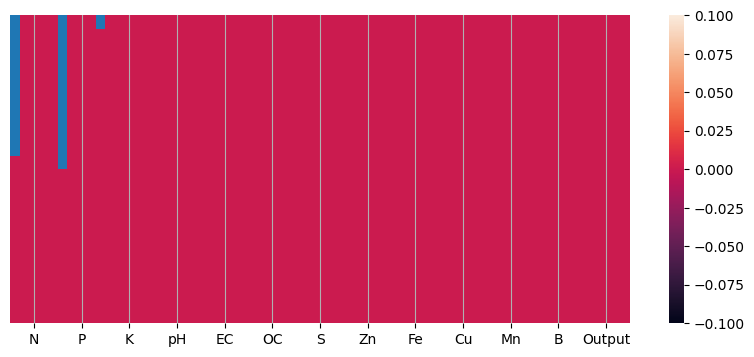

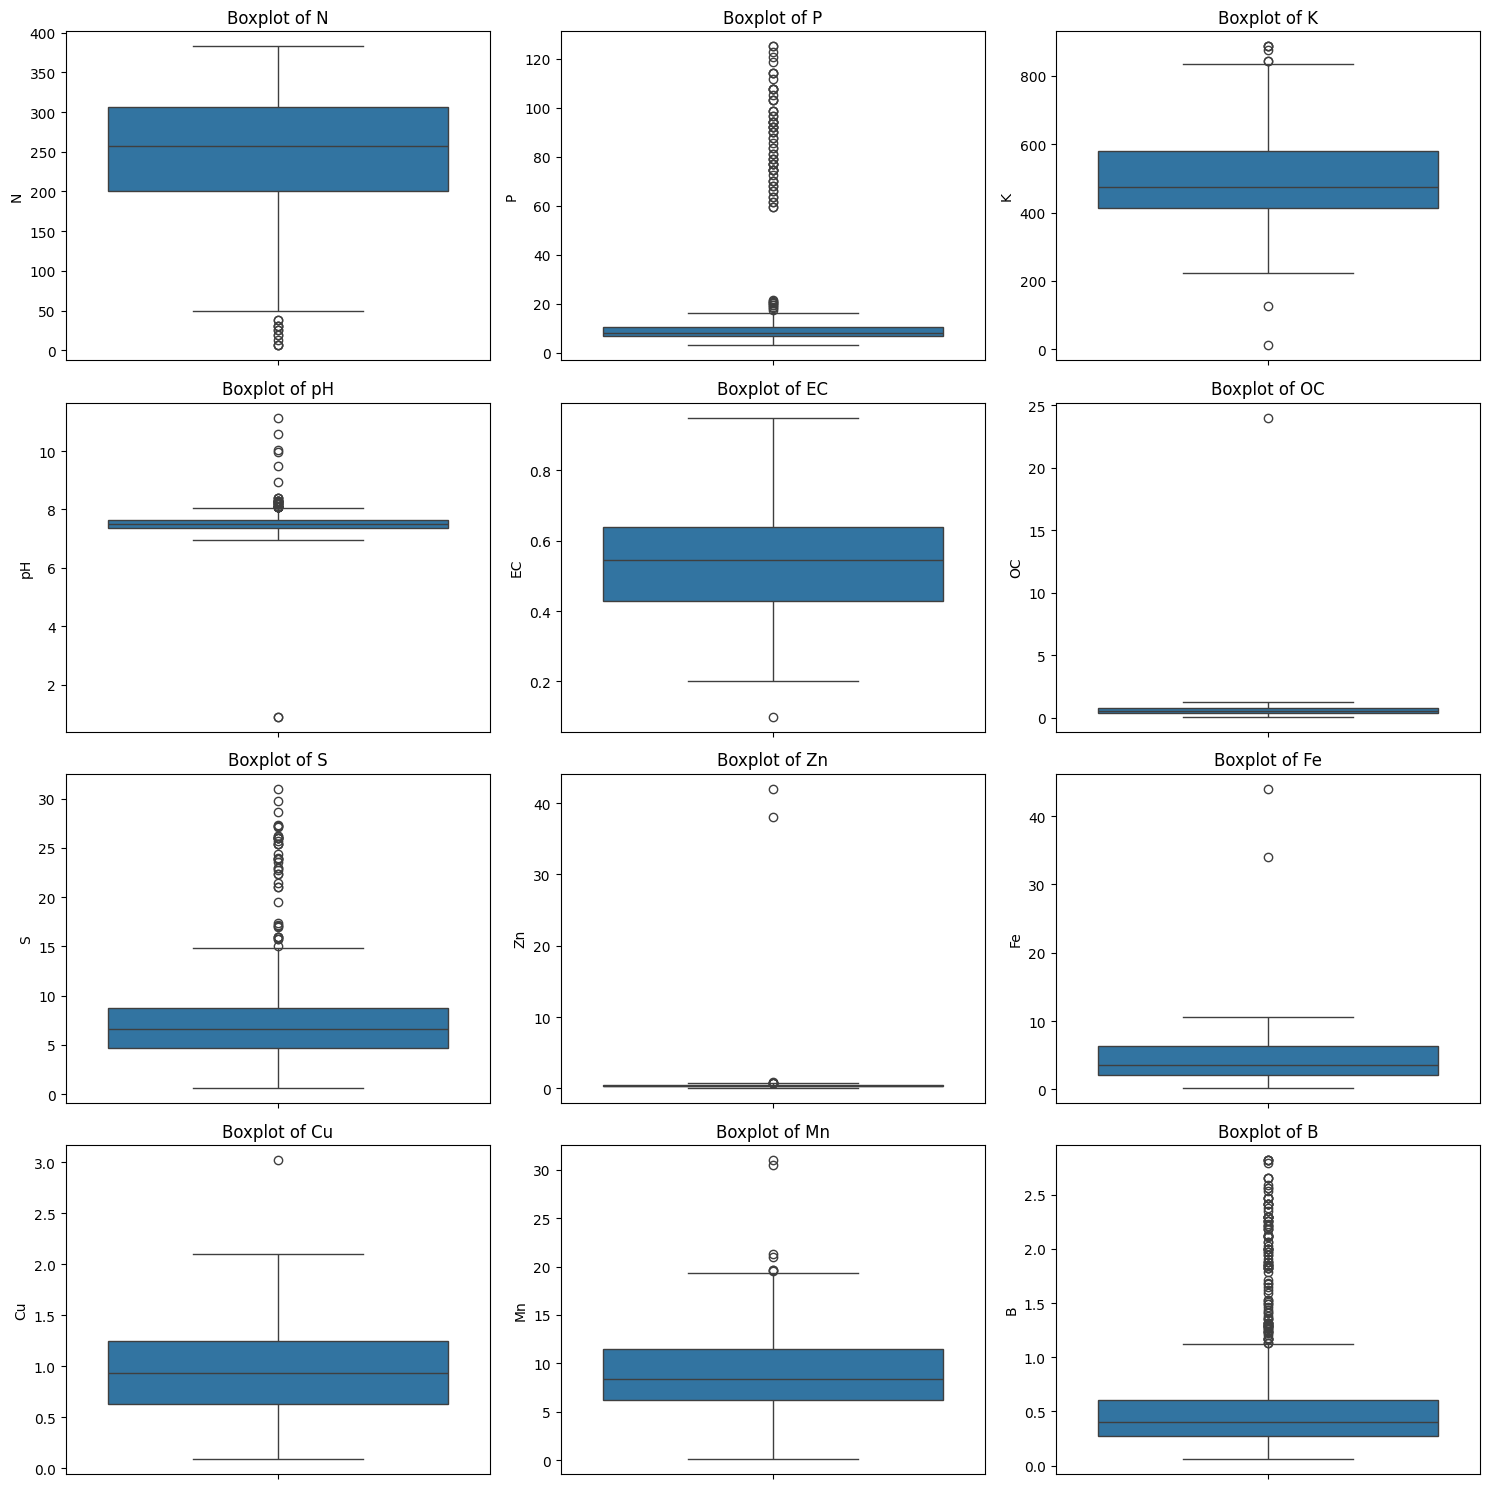

Original shape: (880, 13)
Shape after removing outliers: (623, 13)
Training input shape: (398, 12)
Validation input shape: (100, 12)
Test input shape: (125, 12)


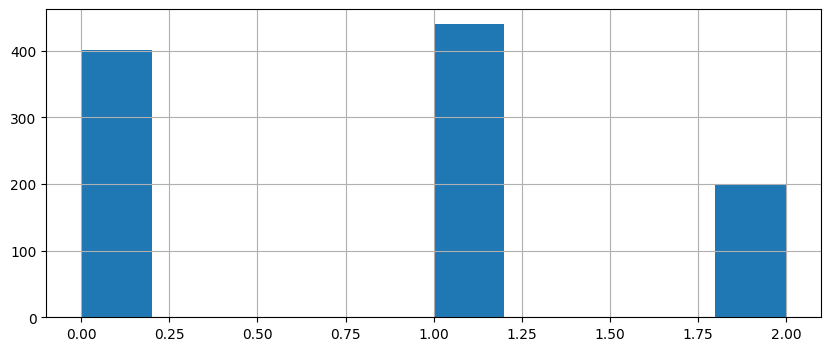

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset and handle missing values
missing_values = ["N/a", "na", np.nan]
Data = pd.read_csv('/content/dataset1.csv', na_values=missing_values)

# Initial exploration
Data.head()
Data.info()
sns.heatmap(Data.isnull(), yticklabels=False)
Data.duplicated().sum()
Data.describe()
Data['Output'].hist(figsize=(10, 4))

# Check outliers by plotting boxplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(Data.columns):
    if column == 'Output':
        continue
    sns.boxplot(data=Data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Remove outliers using IQR
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_features = Data[~((Data < lower_bound) | (Data > upper_bound)).any(axis=1)]

print("Original shape:", Data.shape)
print("Shape after removing outliers:", filtered_features.shape)

# Handle class imbalance by oversampling minority class
class_0 = Data[Data['Output'] == 0]
class_1 = Data[Data['Output'] == 1]
class_2 = Data[Data['Output'] == 2]

class_2_oversampled = resample(class_2,
                               replace=True,
                               n_samples=200,
                               random_state=42)
oversampled_data = pd.concat([class_0, class_1, class_2_oversampled])
Data = oversampled_data
Data['Output'].hist(figsize=(10, 4))

# Feature scaling using MinMaxScaler
labels = filtered_features[['Output']]
features = filtered_features.drop('Output', axis=1)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Train-test split
Input, testInput, Target, testTarget = train_test_split(
    scaled_features_df, labels, test_size=0.2, shuffle=True, random_state=42
)
trainInput, validationInput, trainTarget, validationTarget = train_test_split(
    Input, Target, test_size=0.2, shuffle=True, random_state=42
)

print("Training input shape:", trainInput.shape)
print("Validation input shape:", validationInput.shape)
print("Test input shape:", testInput.shape)
